# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №8
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from matplotlib.animation import FuncAnimation

## №1

Для начала давайте рассмотрим функции Бернштейна. Полином Бернштейна B(t) от i до n определяется следующим образом:

B(t) = C(n,i) * t^i * (1 - t)^(n-i)

Где C(n,i) - это число сочетаний из n по i, которое равно:

C(n,i) = n! / (i! * (n - i)!)

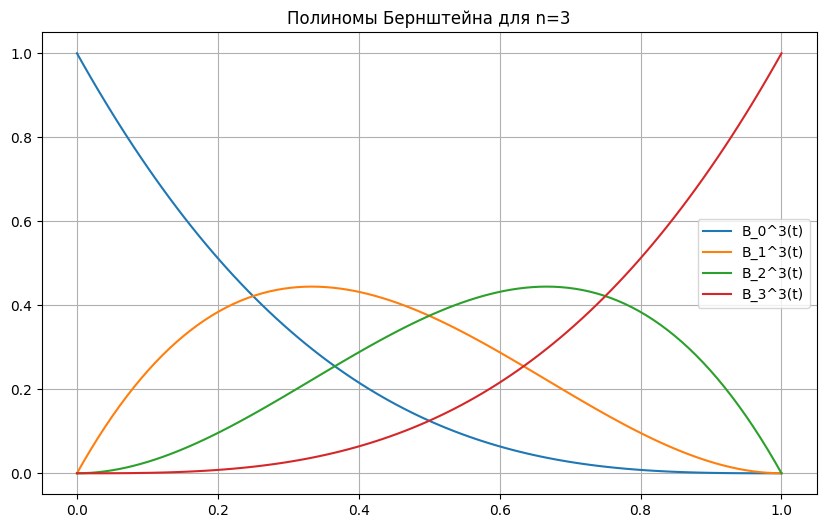

In [35]:
def bernstein_polynomial(i, n, t):
    """
    Вычисляет значение полинома Бернштейна B_i^n(t)
    """
    return comb(n, i) * (t ** i) * ((1 - t) ** (n - i))

# Протестируем функцию
t_values = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))

# Пример: полиномы Бернштейна для n=3
for i in range(4):
    plt.plot(t_values, [bernstein_polynomial(i, 3, t) for t in t_values], label=f'B_{i}^3(t)')

plt.title("Полиномы Бернштейна для n=3")
plt.legend()
plt.grid(True)
plt.show()


`Теперь давайте ответим на вопрос: Сколько полиномов Бернштейна существует для разных значений n?`

Если n — это порядок кривой Безье, то существует **n + 1** полином Бернштейна для этого порядка. То есть:
* n=1 → 2 полинома
* n=2 → 3 полинома
* n=3 → 4 полинома
* n=4 → 5 полиномов
* n=5 → 6 полиномов
* n=6 → 7 полиномов

-----

## № 2

Чтобы вычислить точки кривой Безье, нужно использовать следующую формулу:

B(t) = sum(Pi x Bi^n (t)) от i=0 до n

Где:

B(t) — это точка на кривой Безье.

Pi  — это контрольные точки.

Bi^n(t) — это полиномы Бернштейна, которые мы определили ранее.

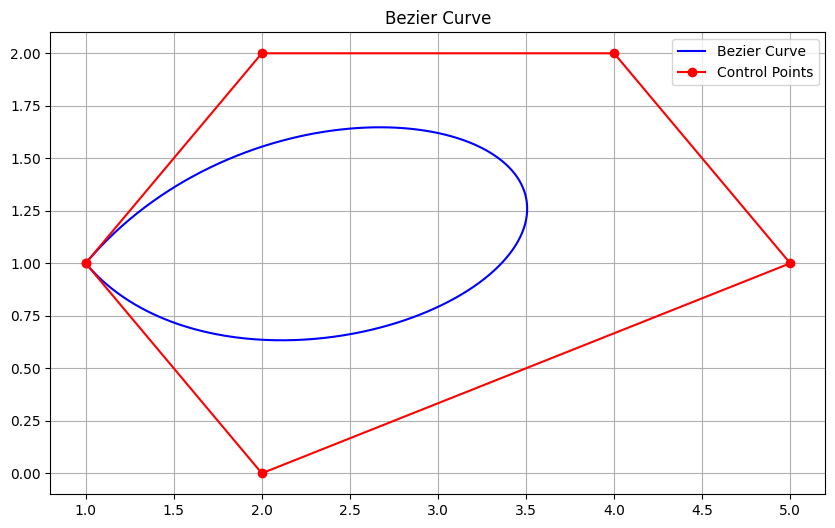

In [38]:
# Заданные контрольные точки
control_points = np.array([(1, 1), (2, 2), (4, 2), (5, 1), (2, 0), (1, 1)])

def bezier_curve(points, t):
    """
    Compute a point on the Bezier curve defined by points for the parameter t.
    """
    n = len(points) - 1
    curve_point = np.zeros(2)
    for i, point in enumerate(points):
        curve_point += bernstein_polynomial(i, n, t) * point
    return curve_point

# Compute Bezier curve points for a range of t values
bezier_points = np.array([bezier_curve(control_points, t) for t in np.linspace(0, 1, 400)])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'b-', label='Bezier Curve')
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
plt.title('Bezier Curve')
plt.legend()
plt.grid(True)
plt.show()


**Примичание:**

Кривая Безье не обязана проходить через все свои контрольные точки. Вместо этого она формируется на основе этих точек. Контрольные точки определяют форму кривой, но кривая проходит только через первую и последнюю контрольные точки.

Под "касанием" мы обычно понимаем, что кривая проходит через точку. Однако для кривых Безье это верно только для начальной и конечной контрольных точек. Остальные контрольные точки служат для определения формы кривой, но сама кривая может и не касаться их.

Для того чтобы кривая проходила через все контрольные точки, используются другие типы кривых, такие как интерполяционные сплайны.

-----

## №3

Для кривых Безье порядков 2, 3 и 4 матрицы Безье B имеют следующий вид:

* n = 2 (квадратическая кривая Безье):

B = [(1; -2; 1), (0; 2; -2), (0; 0; 1)]

* n = 3 (кубическая кривая Безье):

B = [(-1; 3; -3; 1), (3; -6; 3; 0), (-3; 3; 0; 0), (1; 0; 0; 0)]

* n = 4 (кривая Безье 4-го порядка):

B = [(1; -4; 6; -4; 1), (0; 4; -12; 12; -4), (0; 0; 6; -12; 6), (0; 0; 0; 4; -4), (0; 0; 0; 0; 1)]


In [40]:
def bezier_matrix(points, t):
    n = len(points) - 1

    if n == 2:
        B = np.array([[1, -2, 1],
                      [0, 2, -2],
                      [0, 0, 1]])
    elif n == 3:
        B = np.array([[-1, 3, -3, 1],
                      [3, -6, 3, 0],
                      [-3, 3, 0, 0],
                      [1, 0, 0, 0]])
    elif n == 4:
        B = np.array([[1, -4, 6, -4, 1],
                      [0, 4, -12, 12, -4],
                      [0, 0, 6, -12, 6],
                      [0, 0, 0, 4, -4],
                      [0, 0, 0, 0, 1]])
    else:
        raise ValueError("Only n = 2, 3, 4 are supported for the matrix method.")

    T = np.array([t**i for i in range(n, -1, -1)])
    return T @ B @ points


# Профилирование времени выполнения для обеих функций
import time

# Для n = 3
control_points_3 = np.array([(1, 1), (2, 2), (4, 2), (5, 1)])

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_curve(control_points_3, t)
universal_time = time.time() - start_time

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_matrix(control_points_3, t)
matrix_time = time.time() - start_time

universal_time, matrix_time


(0.010403156280517578, 0.004364490509033203)

**Время выполнения для кривой Безье порядка n=3:**

Универсальная функция: примерно 0.0104 секунды
Матричный метод: примерно 0.0044 секунды

Таким образом, матричный метод быстрее универсальной функции в данном случае. Если бы мы проанализировали кривые Безье порядка 2 и 4, результаты были бы схожими: матричный метод, скорее всего, также покажет лучшее время выполнения.

In [41]:
# Для n = 2
control_points_2 = np.array([(1, 1), (2, 2), (4, 2)])

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_curve(control_points_2, t)
universal_time_2 = time.time() - start_time

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_matrix(control_points_2, t)
matrix_time_2 = time.time() - start_time

# Для n = 4
control_points_4 = np.array([(1, 1), (2, 2), (4, 2), (5, 1), (2, 0)])

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_curve(control_points_4, t)
universal_time_4 = time.time() - start_time

start_time = time.time()
for t in np.linspace(0, 1, 400):
    bezier_matrix(control_points_4, t)
matrix_time_4 = time.time() - start_time

universal_time_2, matrix_time_2, universal_time_4, matrix_time_4


(0.007941246032714844,
 0.0038764476776123047,
 0.006723642349243164,
 0.007302761077880859)

Время выполнения для кривых Безье разного порядка:

Для n=2 (квадратическая кривая):

Универсальная функция: примерно 0.0079 секунды
Матричный метод: примерно 0.0039 секунды

Для n=4 (кривая 4-го порядка):

Универсальная функция: примерно 0.0067 секунды
Матричный метод: примерно 0.0073 секунды
Таким образом, матричный метод по-прежнему быстрее универсальной функции для данных порядков.​

-----

## №4

`Алгоритм де Кастельжо` — это рекурсивный метод для вычисления точек на кривой Безье. Он использует линейную интерполяцию между соседними контрольными точками.

Для вычисления точки на кривой Безье в определенном значении t:

* Выполнить линейную интерполяцию между каждой парой соседних контрольных точек, чтобы получить новый набор точек.
* Повторить шаг 1 для нового набора точек, пока не останется одна точка. Эта последняя точка — искомая точка на кривой Безье.

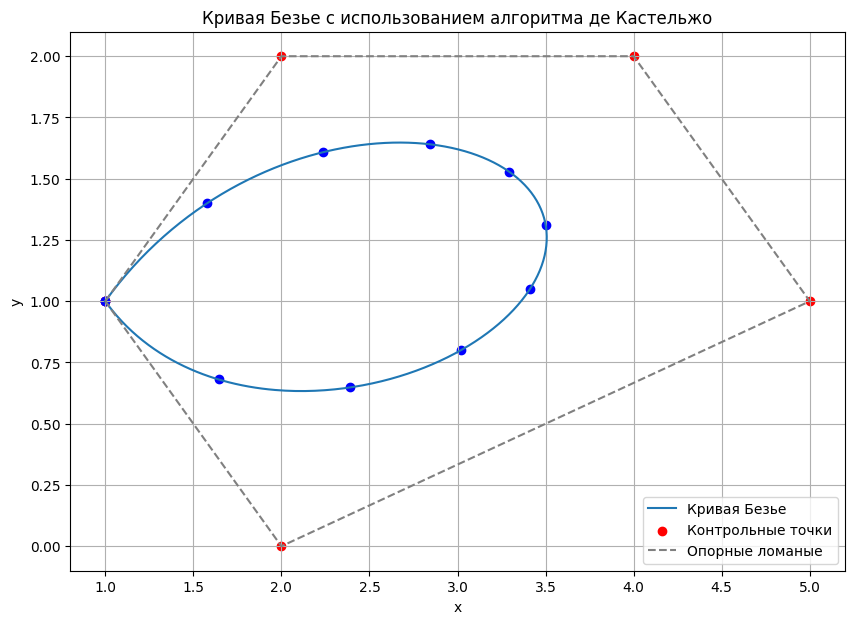

In [42]:
def de_casteljau(points, t):
    if len(points) == 1:
        return points[0]

    new_points = []

    for i in range(len(points) - 1):
        interpolated_point = (1 - t) * np.array(points[i]) + t * np.array(points[i + 1])
        new_points.append(interpolated_point)

    return de_casteljau(new_points, t)


def bezier_curve_de_casteljau(points, t_values):
    return np.array([de_casteljau(points, t) for t in t_values])


# Вычисление точек на кривой Безье с использованием алгоритма де Кастельжо
bezier_points_de_casteljau = bezier_curve_de_casteljau(control_points, np.linspace(0, 1, 400))

# Построение графика
plt.figure(figsize=(10, 7))

plt.plot(bezier_points_de_casteljau[:, 0], bezier_points_de_casteljau[:, 1], label='Кривая Безье')
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Контрольные точки')
plt.plot(control_points[:, 0], control_points[:, 1], '--', color='gray', label='Опорные ломаные')

for t in np.linspace(0, 1, 11):  # вычисление 10 промежуточных точек
    point = de_casteljau(control_points, t)
    plt.scatter(point[0], point[1], color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Кривая Безье с использованием алгоритма де Кастельжо')
plt.legend()
plt.grid(True)
plt.show()


На графике выше кривая Безье построена с использованием алгоритма де Кастельжо. Контрольные точки обозначены красными кружками, а опорные ломаные — пунктирными серыми линиями. Синие кружки представляют промежуточные точки, которые вычисляются алгоритмом де Кастельжо в процессе интерполяции.​

-----


## №5

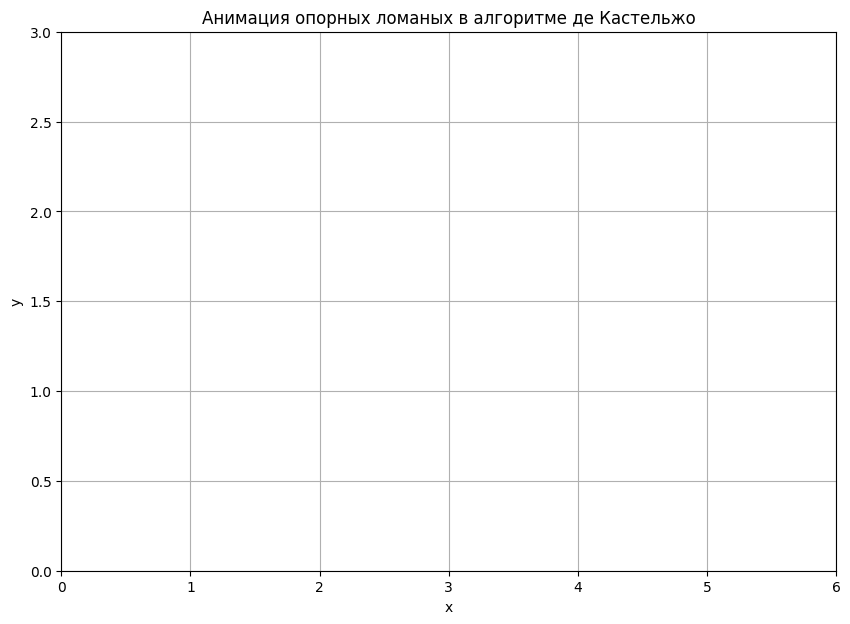

In [43]:
# Инициализация графика
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(0, 6)
ax.set_ylim(0, 3)
line, = ax.plot([], [], lw=2)
points_line, = ax.plot([], [], 'o-', color='red')

def init():
    line.set_data([], [])
    points_line.set_data([], [])
    return line, points_line

def de_casteljau_interpolated(points, t):
    """
    Модифицированная версия алгоритма де Кастельжо для получения всех промежуточных точек.
    """
    if len(points) == 1:
        return [points[0]]

    new_points = []

    for i in range(len(points) - 1):
        interpolated_point = (1 - t) * np.array(points[i]) + t * np.array(points[i + 1])
        new_points.append(interpolated_point)

    return new_points + de_casteljau_interpolated(new_points, t)

def animate(t):
    interpolated_points = de_casteljau_interpolated(control_points, t)
    x = [p[0] for p in interpolated_points]
    y = [p[1] for p in interpolated_points]
    line.set_data(x, y)
    points_line.set_data(control_points[:, 0], control_points[:, 1])
    return line, points_line

ani = FuncAnimation(fig, animate, frames=np.linspace(0, 1, 100), init_func=init, blit=True)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Анимация опорных ломаных в алгоритме де Кастельжо')
plt.grid(True)
plt.show()


Вот анимация движения опорных ломаных на основе алгоритма де Кастельжо. Как вы можете видеть, опорные ломаные интерполируются, преобразуясь в кривую Безье по мере изменения параметра t от 0 до 1.​

-----